In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

In [3]:
# Load data
x_train = np.load("dataset/x_train.npy")
y_train = np.load("dataset/y_train.npy")
x_test = np.load("dataset/x_test.npy")
y_test = np.load("dataset/y_test.npy")

# 7000 data with 300 features
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# It's a binary classification problem 
print(np.unique(y_train))

(7000, 300)
(7000,)
(3000, 300)
(3000,)
[0 1]


# Q1

In [3]:
def cross_validation(x_train, y_train, k=5):
    num_total = len(x_train)
    num_fold = int(num_total / k)
    num_remainder = num_total % k
    numList = [num_fold for i in range(k)]
    for i in range(num_remainder):
        numList[i] += 1
    
    indexList = []
    index = [i for i in range(num_total)]
    for i in range(k):
        fold_index = random.sample(index, numList[i])
        indexList.append(fold_index)
        index = list(set(index) - set(fold_index))
    
    fold_data = []
    index = [i for i in range(num_total)]
    for i in range(k):
        val_index = indexList[i]
        train_index = list(set(index) - set(val_index))
        val_index = np.array(val_index)
        train_index = np.array(train_index)
        fold_data.append([train_index, val_index])

    return fold_data

In [4]:
kfold_data = cross_validation(x_train, y_train, k=10)

assert len(kfold_data) == 10            # should contain 10 fold of data
assert len(kfold_data[0]) == 2          # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

# K-Fold Example

In [5]:
from sklearn.model_selection import KFold

X = np.arange(20)

kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  3  4  7  8  9 10 11 12 13 14 15 16 18], Validation index: [ 5  6 17 19]
Split: 2, Training index: [ 0  2  3  4  5  6  8  9 10 12 13 15 16 17 18 19], Validation index: [ 1  7 11 14]
Split: 3, Training index: [ 0  1  2  5  6  7  8  9 10 11 12 14 16 17 18 19], Validation index: [ 3  4 13 15]
Split: 4, Training index: [ 0  1  3  4  5  6  7  9 10 11 12 13 14 15 17 19], Validation index: [ 2  8 16 18]
Split: 5, Training index: [ 1  2  3  4  5  6  7  8 11 13 14 15 16 17 18 19], Validation index: [ 0  9 10 12]


In [6]:
assert len(kfold_data) == 5            # should contain 5 fold of data
assert len(kfold_data[0]) == 2         # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4  # The number of data in each validation fold should equal to training data divieded by K

## Q2

In [7]:
# (Example) Using SVC from sklearn
clf = SVC(C=1.0, gamma=0.01, kernel='rbf')

In [8]:
def cross_val_score(clf, x_train, y_train, fold_data):
    scores = np.zeros(len(fold_data))
    for i in range(len(fold_data)):
        xtrain = x_train[fold_data[i][0], :]
        ytrain = y_train[fold_data[i][0]]
        xval = x_train[fold_data[i][1], :]
        yval = y_train[fold_data[i][1]]
        clf.fit(xtrain, ytrain)
        scores[i] = clf.score(xval, yval)
    mean_score = np.mean(scores)
    return mean_score
        
def Grid_Search(C_list, gamma_list, x_train, y_train, fold_data):
    Grid = np.zeros((len(C_list), len(gamma_list)))
    best_accuracy, best_C, best_gamma, best_model = 0, 0, 0, None
    for i, gamma in enumerate(gamma_list):
        for j, C in enumerate(C_list):
            clf = SVC(C=C, gamma=gamma, kernel='rbf')
            accuracy = cross_val_score(clf, x_train, y_train, fold_data)
            print(f"C = {C}\t  gamma = {gamma}\t  ----->  Accuracy = {accuracy}")
            Grid[j, i] = accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_C = C
                best_gamma = gamma
                best_model = clf
        print("---------------------------------------------------------------------------")
    return best_accuracy, best_C, best_gamma, Grid, best_model

# best_c, best_gamma = None, None
# # TODO HERE
# # k-Flod Cross Validation and Grid Search
# best_parameters=(best_c, best_gamma)

In [9]:
kfold_data = cross_validation(x_train, y_train, k=5)
C_list = [0.1, 1.0, 1e1, 1e3, 1e5]
gamma_list = [0.00001, 0.0001, 0.001, 0.01, 0.1]
best_accuracy, best_C, best_gamma, Grid, best_model = Grid_Search(C_list, gamma_list, x_train, y_train, kfold_data)
best_parameters = (best_C, best_gamma)
print("(best_C, best_gamma) is ", best_parameters)

C = 0.1	  gamma = 1e-05	  ----->  Accuracy = 0.9294285714285714
C = 1.0	  gamma = 1e-05	  ----->  Accuracy = 0.9667142857142859
C = 10.0	  gamma = 1e-05	  ----->  Accuracy = 0.9865714285714287
C = 1000.0	  gamma = 1e-05	  ----->  Accuracy = 0.9917142857142857
C = 100000.0	  gamma = 1e-05	  ----->  Accuracy = 0.9917142857142857
---------------------------------------------------------------------------
C = 0.1	  gamma = 0.0001	  ----->  Accuracy = 0.9801428571428572
C = 1.0	  gamma = 0.0001	  ----->  Accuracy = 0.9949999999999999
C = 10.0	  gamma = 0.0001	  ----->  Accuracy = 0.9949999999999999
C = 1000.0	  gamma = 0.0001	  ----->  Accuracy = 0.9949999999999999
C = 100000.0	  gamma = 0.0001	  ----->  Accuracy = 0.9949999999999999
---------------------------------------------------------------------------
C = 0.1	  gamma = 0.001	  ----->  Accuracy = 0.4932857142857143
C = 1.0	  gamma = 0.001	  ----->  Accuracy = 0.4932857142857143
C = 10.0	  gamma = 0.001	  ----->  Accuracy = 0.493285714

# Q3

<Figure size 1080x1080 with 0 Axes>

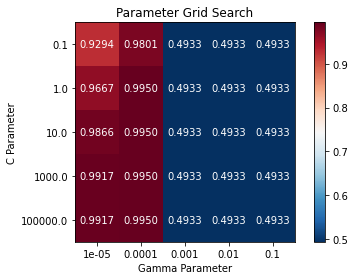

In [10]:
# Plot the grid search results of your SVM
# TODO HERE

def heatmap(data, row_labels, col_labels, ax=None, cbar_kw=None, cbarlabel="", **kwargs):
    if ax is None:
        ax = plt.gca()
    if cbar_kw is None:
        cbar_kw = {}
    im = ax.imshow(data, **kwargs)                                   # Plot the heatmap
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)                  # Create colorbar
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(labels=col_labels)
    ax.set_yticklabels(labels=row_labels)
    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}", **textkw):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
    kw = dict(horizontalalignment="center", verticalalignment="center")
    kw.update(textkw)
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color="w")
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)
    return texts


plt.figure(figsize=(15,15))
fig, ax = plt.subplots()
im, cbar = heatmap(Grid, C_list, gamma_list, ax=ax, cmap="RdBu_r")
texts = annotate_heatmap(im, valfmt="{x:.4f}")
plt.title("Parameter Grid Search")
plt.ylabel("C Parameter")
plt.xlabel("Gamma Parameter") 
fig.tight_layout()
plt.show()

## Q4

In [11]:
# Do Not Modify Below

best_model = SVC(C=best_parameters[0], gamma=best_parameters[1], kernel='rbf')
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

print("Accuracy score: ", accuracy_score(y_pred, y_test))

# If your accuracy here > 0.9 then you will get full credit (20 points).

Accuracy score:  0.995
